## Librería para gráficos interactivos

Plotly

#instalación en visual studio (desde el cmd) no ejecuten esto

pip install plotly

pip install nbformat --upgrade

Cada uno por separado

Datos atípicos

In [6]:
# se cargan las librerias
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#se carga el data frame
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/jarsmp37/introds/main/Churn_Bank.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1.0,15634602.0,Hargrave,619,France,Female,NaN,2,0.0,1.0,1,1,101348.88,1,1,2,DIAMOND,464
1,2.0,15647311.0,Hill,608,Spain,Female,41.0,1,83807.86,1.0,0,1,112542.58,0,1,3,DIAMOND,456
2,3.0,15619304.0,Onio,502,France,Female,42.0,8,159660.8,3.0,1,0,113931.57,NaN,1,3,DIAMOND,377
3,4.0,15701354.0,Boni,699,France,Female,39.0,1,0.0,2.0,0,0,93826.63,0,invalid_value,5,GOLD,350
4,5.0,15737888.0,Mitchell,850,Spain,Female,NaN,2,125510.82,1.0,1,1,invalid_value,0,0,5,GOLD,425


In [8]:
#Para datos atípicos se necesita el boxplot numérico, se convertira la columna en este caso age a numérica
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [9]:
#se verifica que ya es numérico
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           12069 non-null  object 
 1   CustomerId          12050 non-null  object 
 2   Surname             12083 non-null  object 
 3   CreditScore         12080 non-null  object 
 4   Geography           12076 non-null  object 
 5   Gender              12069 non-null  object 
 6   Age                 11943 non-null  float64
 7   Tenure              12079 non-null  object 
 8   Balance             12065 non-null  object 
 9   NumOfProducts       12085 non-null  object 
 10  HasCrCard           12052 non-null  object 
 11  IsActiveMember      12076 non-null  object 
 12  EstimatedSalary     12061 non-null  object 
 13  Exited              12065 non-null  object 
 14  Complain            12060 non-null  object 
 15  Satisfaction Score  12060 non-null  object 
 16  Card

In [10]:
#se grafica de forma interactiva con plotly el boxplot (se puede usar seaborn o matplotlib)
fig = px.box(df, y='Age', title='Detección de datos atípicos')
fig.update_layout(width=300,height=500) 
fig.show()

Se utilizará el método de rango intercuartílico en la columna age

In [11]:
#Se define el cuartil 75 y se le resta el cuartil 25
iqr = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
#Desarrollamos filtros superior o inferior por lo general es el iqr por 1.5 pero se puede manejar el número
filtro_inferior = df['Age'] > df['Age'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['Age'] < df['Age'].quantile(0.75) + (iqr * 1.3)

df_filtrado = df[filtro_inferior & filtro_superior]

#Graficando el boxplot
fig = px.box(df_filtrado, y='Age', title='Datos atípicos eliminados')
fig.update_layout(width=300,height=500) 
fig.show() 

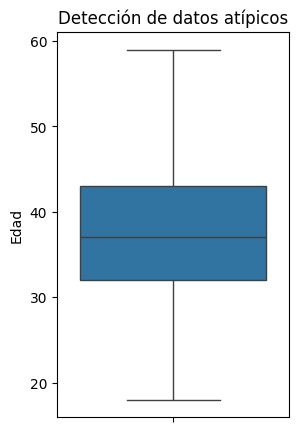

In [13]:
# o con seaborn
# Generar el boxplot con Seaborn
plt.figure(figsize=(3, 5))  # Ajusta el tamaño de la figura
sns.boxplot(y='Age', data=df_filtrado)

# Agregar título y etiquetas
plt.title('Detección de datos atípicos')
plt.ylabel('Edad')
plt.show()

# Gráficas de plotly

In [14]:
#Se carga la base limplia
df=pd.read_csv('https://raw.githubusercontent.com/Dannap7337/Pato/main/Base_limpiaclase.csv')
df=df.drop(columns=['Unnamed: 0'])
df

,CustomerId,Apellido,CreditScore,Pais,Genero,Edad,Estadia,Balance,#Prod,TarjetaCredito,Activo,Salario,Salida,Quejas,Nivel_satisf,Tipo_tarjeta,Puntos
0,15647311,Hill,608,España,Mujer,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
1,15574012,Chu,645,España,Hombre,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
2,15592531,Bartlett,822,Francia,Hombre,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
3,15656148,Obinna,376,Alemania,Mujer,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
4,15792365,He,501,Francia,Hombre,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6659,15677538,Nwokike,569,Francia,Hombre,38,7,0.00,1,1,1,108469.20,0,0,5,SILVER,550
6660,15766575,Larionova,612,Alemania,Mujer,62,8,140745.33,1,1,0,193437.89,1,1,5,GOLD,455
6661,15707602,Macleod,539,Francia,Mujer,47,2,127286.04,2,1,1,166929.43,1,1,1,DIAMOND,551
6662,15733229,Rodriguez,638,España,Mujer,34,7,0.00,2,0,0,3946.29,0,0,2,PLATINUM,504


In [15]:
#Gráfica de dispersión
fig = px.scatter(df, x='CreditScore',y='Edad', title='Diagrama de Dispersión')
fig.show()

In [18]:
#Gráfico de linea por lo general es con línea de tiempo
data = {
    'Fecha': pd.date_range(start='2023-01-01', periods=12, freq='ME'),
    'Ventas': [100, 150, 130, 170, 180, 190, 210, 200, 230, 240, 260, 280]
}
df2 = pd.DataFrame(data)
fig = px.line(df2, x='Fecha', y='Ventas', title='Tendencia de Ventas Mensuales')
fig.show()

In [26]:
#Gráfico de barras
# Usar value_counts() para contar las ocurrencias de cada país
counts = df['Pais'].value_counts().reset_index()
counts.columns = ['Pais', 'Frecuencia']

fig = px.bar(counts, x='Pais', y='Frecuencia', title='Frecuencia de Países', 
              color='Pais')

fig.show()

In [29]:
#Histograma
fig = px.histogram(df, x='Edad', title='Histograma',color="Edad")
fig.show()

In [30]:
#Violin
fig = px.violin(df, y='Balance', title='Diagrama de Violín')
fig.show()

In [32]:
#Gráfico de pastel
fig = px.pie(df, names='Genero', title='Gráfico de Pastel')
fig.show()

In [33]:
# Gráfico de sol
fig = px.sunburst(df, path=['Pais', 'Genero', 'Tipo_tarjeta'], values='Puntos', 
                  title='Gráfico de Sol de Clientes')
fig.show()

In [34]:
# Gráfico Treemap
fig = px.treemap(df, path=['Pais', 'Genero', 'Tipo_tarjeta'], values='Puntos',
                 title='Treemap de Clientes')
fig.show()

In [35]:
#Gráfico de densidad
fig = px.density_heatmap(df, x='Edad', y='Balance', 
                         title='Mapa de Calor de Densidad de Edad vs Balance')
fig.show()

In [36]:
# Gráfico 3D Scatter Plot
fig = px.scatter_3d(df, x='Edad', y='Balance', z='Salario', 
                    color='Genero', title='Diagrama de Dispersión 3D')

fig.show()

In [39]:
#libreria para gráficos avanzados
import plotly.graph_objects as go

#Grafica candelstick para precios de acciones
data_candlestick = {
    'Fecha': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'Apertura': [100, 102, 104, 103, 105, 106, 104, 107, 110, 109],
    'Cierre': [102, 104, 103, 105, 106, 104, 107, 110, 109, 111],
    'Máximo': [103, 105, 105, 106, 107, 108, 109, 111, 112, 113],
    'Mínimo': [99, 100, 102, 101, 102, 103, 103, 105, 108, 108]
}
df_candlestick = pd.DataFrame(data_candlestick)

fig = go.Figure(data=[go.Candlestick(x=df_candlestick['Fecha'],
                                       open=df_candlestick['Apertura'],
                                       high=df_candlestick['Máximo'],
                                       low=df_candlestick['Mínimo'],
                                       close=df_candlestick['Cierre'])])


fig.update_layout(title='Gráfico de Velas', xaxis_title='Fecha', yaxis_title='Precio')
fig.show()

In [41]:
#Gráfico waterfall
data_waterfall = {
    'Categoría': ['Inicio', 'Ingreso', 'Gastos', 'Ahorros', 'Final'],
    'Valor': [1000, 400, -200, 300, 0]  
}
df_waterfall = pd.DataFrame(data_waterfall)

fig = go.Figure(data=[go.Waterfall(
    name="Flujo de efectivo",
    orientation="v",
    x=df_waterfall['Categoría'],
    y=df_waterfall['Valor'],
    textposition="outside",
    connector=dict(line=dict(color="royalblue"))
)])

fig.update_layout(title='Gráfico de Cascada')
fig.show()


In [42]:
#Gráfico de burbuja
data_bubble = {
    'CustomerId': [1, 2, 3, 4, 5, 6],
    'Balance': [1000, 2000, 1500, 800, 3000, 2500],
    'Salario': [30000, 40000, 50000, 28000, 32000, 45000],
    'Puntos': [100, 200, 300, 400, 150, 250]
}
df_bubble = pd.DataFrame(data_bubble)

fig = go.Figure(data=go.Scatter(
    x=df_bubble['Balance'],
    y=df_bubble['Salario'],
    mode='markers',
    marker=dict(
        size=df_bubble['Puntos'],
        color='blue',
        opacity=0.5,
        line=dict(width=2)
    )
))

fig.update_layout(title='Gráfico de Burbujas', xaxis_title='Balance', yaxis_title='Salario')
fig.show()


In [43]:
# Sankey Diagram
data_sankey = {
    'source': [0, 1, 0, 2, 3],  # Índices de las categorías de origen
    'target': [3, 3, 4, 5, 5],  # Índices de las categorías de destino
    'value': [8, 4, 2, 8, 4]     # Valores de flujo
}
df_sankey = pd.DataFrame(data_sankey)

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=["A", "B", "C", "D", "E", "F"]  # Etiquetas de nodos
    ),
    link=dict(
        source=df_sankey['source'],
        target=df_sankey['target'],
        value=df_sankey['value']
    )
)])

fig.update_layout(title='Diagrama de Flujo Sankey')
fig.show()
